# Figure 2: Functional classification of mouse RGC types.

# import

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.patches as patches

# Load data

In [2]:
file_path = 'ADD_YOUR_PATH_TO_DATA_HERE'

# Ctrl 1
with open(file_path+'/ctrl_dataset_c1.pkl', 'rb') as handle:
    dict_c1 = pickle.load(handle)
    
# Ctrl 2
with open(file_path+'/ctrl_dataset_c2.pkl', 'rb') as handle:
    dict_c2 = pickle.load(handle)
    
# Ctrl
with open(file_path+'/no_dataset_c.pkl', 'rb') as handle:
    dict_c_no = pickle.load(handle)
    
# DETA/NO
with open(file_path+'/no_dataset_no.pkl', 'rb') as handle:
    dict_d_no = pickle.load(handle)
    
# Baden et al. (2016)
with open(file_path+'/rgc_baden.pickle', 'rb') as handle:
    rgc_baden = pickle.load(handle)

# --------------------------------------------------------------------------------------------------------------------

## frequency comparison baden vs. mine

### Type 1-32: type frequency comparison

In [3]:
len_c_no=np.zeros(32)
len_c1=np.zeros(32)
len_c=np.zeros(32)

for i,j in enumerate(range(1,33)):
    len_c1[i] = round(np.where(dict_c1['cell_type']==j)[0].shape[0]/np.where(dict_c1['cell_type']<=32)[0].shape[0],3)
    
for i,j in enumerate(range(1,33)):
    len_c_no[i] = round(np.where(dict_c_no['cell_type']==j)[0].shape[0]/np.where(dict_c_no['cell_type']<=32)[0].shape[0],3)

for i,j in enumerate(range(1,33)):
    len_c[i] = round((np.where(dict_c_no['cell_type']==j)[0].shape[0] + np.where(dict_c1['cell_type']==j)[0].shape[0]) / (np.where(dict_c_no['cell_type']<=32)[0].shape[0] + np.where(dict_c1['cell_type']<=32)[0].shape[0]),3)
    
len_baden=np.zeros(32)
for i,j in enumerate(range(1,33)):
    len_baden[i] = round(np.where(rgc_baden['label']==j)[0].shape[0]/np.where(rgc_baden['label']<=32)[0].shape[0],3)

In [4]:
len_c1 = np.hstack((0,len_c1[0:32],0))
len_baden = np.hstack((0,len_baden[0:32],0))
len_c_no = np.hstack((0,len_c_no[0:32],0))
len_c = np.hstack((0,len_c[0:32],0))

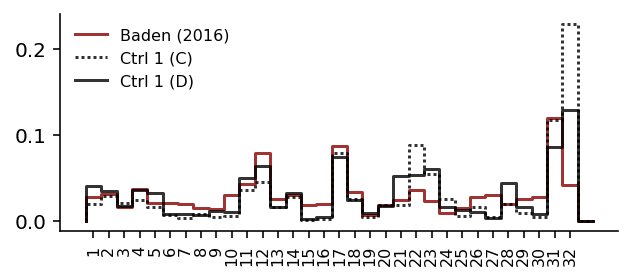

In [5]:
Color_baden = 'darkred'
color_ctrl = 'lightgray'
color_ctrl = 'k'


fig, ax = plt.subplots(1,1,figsize=(5,2))
ax.step(np.arange(0.5,34.5,1),len_baden[0:34],color=Color_baden,alpha=0.8,label='Baden (2016)');
ax.step(np.arange(0.5,34.5,1),len_c1[0:34],color=color_ctrl,alpha=0.8,label='Ctrl 1 (C)',ls=(0, (1, 1)));
ax.step(np.arange(0.5,34.5,1),len_c_no[0:34],color=color_ctrl,alpha=0.8,label='Ctrl 1 (D)',ls='-');
ax.set_xticks(np.arange(1,33,1))
ax.set_xticklabels(ax.get_xticks(),rotation=90,fontsize=8)
ax.legend(loc=2,fontsize=8,frameon=False)
sns.despine()

# -------------------------------------------------------------------------------------------

# Heatmap with both Ctrl 1 data

In [6]:
ctrl_1_both_chirp = np.vstack((dict_c1['chirp'],dict_c_no['chirp']))
ctrl_1_both_bar = np.vstack((dict_c1['bar'],dict_c_no['bar']))

In [7]:
X = np.random.randint(1,ctrl_1_both_chirp.shape[0], ctrl_1_both_chirp.shape[0])
ctrl_chirp_both_pseudo_shuffled = np.hstack((X[:,None],ctrl_1_both_chirp))
ctrl_bar_both_pseudo_shuffled = np.hstack((X[:,None],ctrl_1_both_bar))

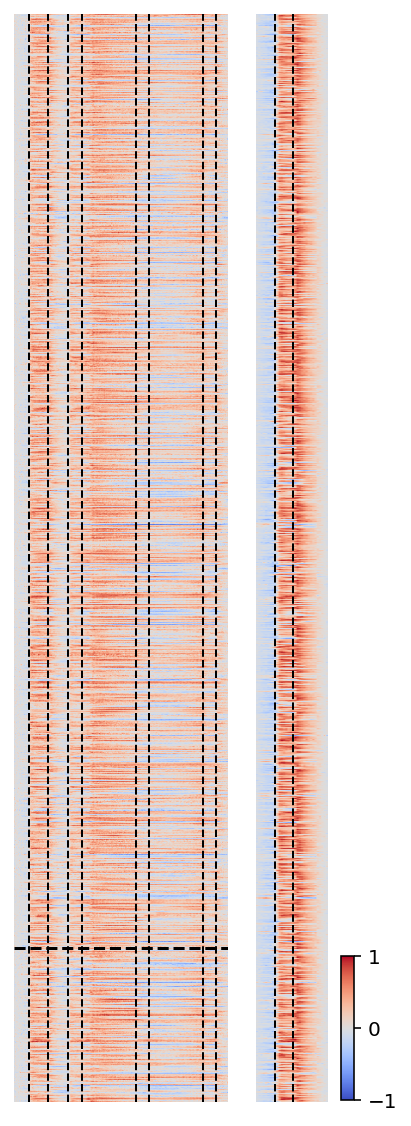

In [8]:
fig, ax = plt.subplots(1,2,figsize=(3,10),gridspec_kw={'width_ratios': [3, 1]})

ax[0].imshow(ctrl_chirp_both_pseudo_shuffled[ctrl_chirp_both_pseudo_shuffled[:, 0].argsort()][:,1:],aspect = "auto",cmap='coolwarm',vmin=-1,vmax=1)
cax = ax[1].imshow(ctrl_bar_both_pseudo_shuffled[ctrl_bar_both_pseudo_shuffled[:, 0].argsort()][:,1:],aspect = "auto",cmap='coolwarm',vmin=-1,vmax=1)

# lines chirp
ax[0].axvline(round(7.81*2),ls='--',color='k',lw=1)
ax[0].axvline(round(7.81*5),ls='--',color='k',lw=1)
ax[0].axvline(round(7.81*8),ls='--',color='k',lw=1)
ax[0].axvline(round(7.81*10),ls='--',color='k',lw=1)
ax[0].axvline(round(7.81*18),ls='--',color='k',lw=1)
ax[0].axvline(round(7.81*20),ls='--',color='k',lw=1)
ax[0].axvline(round(7.81*28),ls='--',color='k',lw=1)
ax[0].axvline(round(7.81*30),ls='--',color='k',lw=1)

# lines MB
ax[1].axvline(round(7.81*1.),ls='--',color='k',lw=1)
ax[1].axvline(round(7.81*2.),ls='--',color='k',lw=1)

ax[0].axhline(ctrl_chirp_both_pseudo_shuffled.shape[0]-500,ls='--',color='k')

ax[0].axis('off')
ax[1].axis('off')

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.126, 0.03, 0.1])
cbar = fig.colorbar(cax, cax=cbar_ax, shrink=0.92)

## sorted by type assignment

In [9]:
c1_chirp_types = np.hstack((dict_c1['cell_type'][:,None],dict_c1['chirp']))
c1_bar_types = np.hstack((dict_c1['cell_type'][:,None],dict_c1['bar']))

c_chirp_types = np.hstack((dict_c_no['cell_type'][:,None],dict_c_no['chirp']))
c_bar_types = np.hstack((dict_c_no['cell_type'][:,None],dict_c_no['bar']))

ctrl_1_both_chirp_ = np.vstack((c1_chirp_types,c_chirp_types))
ctrl_1_both_bar_ = np.vstack((c1_bar_types,c_bar_types))

## add func group lines

In [10]:
labels_both = np.vstack((dict_c1['cell_type'][:,None],dict_c_no['cell_type'][:,None]))
cluster_lines_both = np.zeros(32)
counter=0
for j in range(32):
    idx = np.where(labels_both==j+1)[0]
    cluster_lines_both[j]=len(idx)
    counter=counter+len(idx)

In [11]:
off = int(sum(cluster_lines_both[0:9]))
on_off = int(sum(cluster_lines_both[9:14]))
fast_on = int(sum(cluster_lines_both[14:20]))
slow_on = int(sum(cluster_lines_both[20:28]))
unc_rgc = int(sum(cluster_lines_both[28:32]))

func_groups = [off,on_off,fast_on,slow_on,unc_rgc]

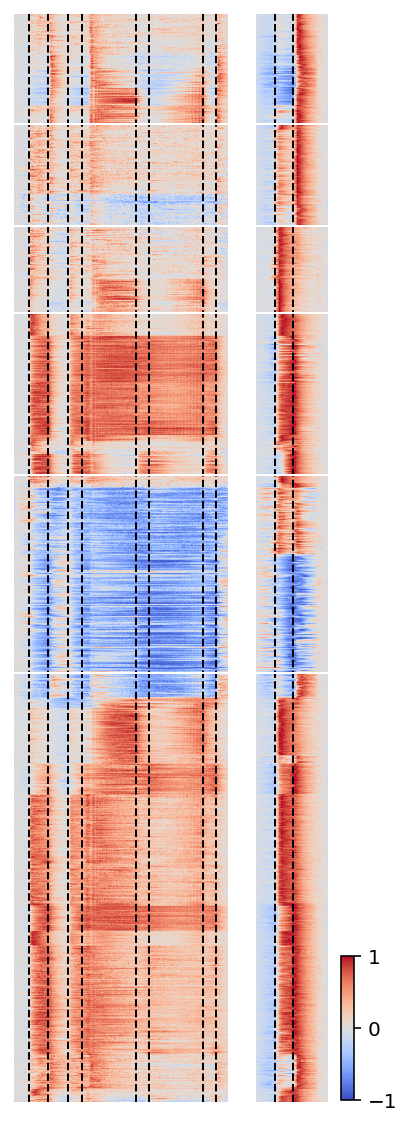

In [12]:
fig, ax = plt.subplots(1,2,figsize=(3,10),gridspec_kw={'width_ratios': [3, 1]})
cax = ax[0].imshow(ctrl_1_both_chirp_[ctrl_1_both_chirp_[:, 0].argsort()][:,1:],aspect = "auto",cmap='coolwarm',vmin=-1,vmax=1)
ax[1].imshow(ctrl_1_both_bar_[ctrl_1_both_bar_[:, 0].argsort()][:,1:],aspect = "auto",cmap='coolwarm',vmin=-1,vmax=1)
ax[0].axis('off')
ax[1].axis('off')
# lines chirp
ax[0].axvline(round(7.81*2),ls='--',color='k',lw=1)
ax[0].axvline(round(7.81*5),ls='--',color='k',lw=1)
ax[0].axvline(round(7.81*8),ls='--',color='k',lw=1)
ax[0].axvline(round(7.81*10),ls='--',color='k',lw=1)
ax[0].axvline(round(7.81*18),ls='--',color='k',lw=1)
ax[0].axvline(round(7.81*20),ls='--',color='k',lw=1)
ax[0].axvline(round(7.81*28),ls='--',color='k',lw=1)
ax[0].axvline(round(7.81*30),ls='--',color='k',lw=1)

# lines MB
ax[1].axvline(round(7.81*1.),ls='--',color='k',lw=1)
ax[1].axvline(round(7.81*2.),ls='--',color='k',lw=1)

for i in range(5):
    ax[0].axhline(np.cumsum((func_groups))[i],color='white',lw=1,ls='-')
    ax[1].axhline(np.cumsum((func_groups))[i],color='white',lw=1,ls='-')

#ax[0].axhline(ctrl_1_both_chirp.shape[0]-200,color='red',lw=1,ls='-')
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.126, 0.03, 0.1])
cbar = fig.colorbar(cax, cax=cbar_ax, shrink=0.92)

# new example traces

## Off

G1; r: 0.841
G1; r: 0.965


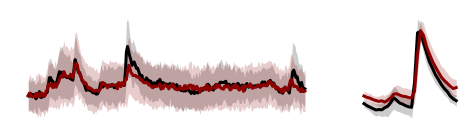

In [13]:
i=0

color_baden = 'darkred'
color_ctrl = 'k'
fig,ax=plt.subplots(1,2,figsize=(4,1),gridspec_kw={'width_ratios': [3, 1]})


idx = np.where(labels_both==i+1)[0]
ax[0].plot(np.mean(ctrl_1_both_chirp[idx,:],axis=0),color=color_ctrl)
ax[0].fill_between(np.arange(0,249,1),np.mean(ctrl_1_both_chirp[idx,:],axis=0)+np.std(ctrl_1_both_chirp[idx,:],axis=0),np.mean(ctrl_1_both_chirp[idx,:],axis=0)-np.std(ctrl_1_both_chirp[idx,:],axis=0),alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax[0].axis('off')


ax[1].plot(np.mean(ctrl_1_both_bar[idx,:],axis=0),color=color_ctrl)
ax[1].fill_between(np.arange(0,32,1),np.mean(ctrl_1_both_bar[idx,:],axis=0)+np.std(ctrl_1_both_bar[idx,:],axis=0),np.mean(ctrl_1_both_bar[idx,:],axis=0)-np.std(ctrl_1_both_bar[idx,:],axis=0),alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax[1].axis('off')


idx_baden = np.where(rgc_baden['label']==i+1)[0]
ax[0].plot(np.mean(rgc_baden['chirp'][idx_baden,:],axis=0),color=color_baden)
ax[0].fill_between(np.arange(0,249,1),np.mean(rgc_baden['chirp'][idx_baden,:],axis=0)+np.std(rgc_baden['chirp'][idx_baden,:],axis=0),np.mean(rgc_baden['chirp'][idx_baden,:],axis=0)-np.std(rgc_baden['chirp'][idx_baden,:],axis=0),alpha=0.2,color=color_baden,edgecolor="b", linewidth=0.0)
ax[0].axis('off')


ax[1].plot(np.mean(rgc_baden['bar'][idx_baden,:],axis=0),color=color_baden)
ax[1].fill_between(np.arange(0,32,1),np.mean(rgc_baden['bar'][idx_baden,:],axis=0)+np.std(rgc_baden['bar'][idx_baden,:],axis=0),np.mean(rgc_baden['bar'][idx_baden,:],axis=0)-np.std(rgc_baden['bar'][idx_baden,:],axis=0),alpha=0.2,color=color_baden,edgecolor="b", linewidth=0.0)
ax[1].axis('off')

print('G'+str(i+1)+'; r: '+str(round(np.corrcoef(np.mean(rgc_baden['chirp'][idx_baden,:],axis=0),np.mean(ctrl_1_both_chirp[idx,:],axis=0))[0,1],3)))
print('G'+str(i+1)+'; r: '+str(round(np.corrcoef(np.mean(rgc_baden['bar'][idx_baden,:],axis=0),np.mean(ctrl_1_both_bar[idx,:],axis=0))[0,1],3)))

G9; r: 0.926
G9; r: 0.944


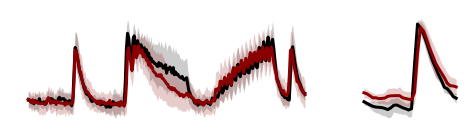

In [14]:
i=8

color_baden = 'darkred'
color_ctrl = 'k'
fig,ax=plt.subplots(1,2,figsize=(4,1),gridspec_kw={'width_ratios': [3, 1]})


idx = np.where(labels_both==i+1)[0]
ax[0].plot(np.mean(ctrl_1_both_chirp[idx,:],axis=0),color=color_ctrl)
ax[0].fill_between(np.arange(0,249,1),np.mean(ctrl_1_both_chirp[idx,:],axis=0)+np.std(ctrl_1_both_chirp[idx,:],axis=0),np.mean(ctrl_1_both_chirp[idx,:],axis=0)-np.std(ctrl_1_both_chirp[idx,:],axis=0),alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax[0].axis('off')


ax[1].plot(np.mean(ctrl_1_both_bar[idx,:],axis=0),color=color_ctrl)
ax[1].fill_between(np.arange(0,32,1),np.mean(ctrl_1_both_bar[idx,:],axis=0)+np.std(ctrl_1_both_bar[idx,:],axis=0),np.mean(ctrl_1_both_bar[idx,:],axis=0)-np.std(ctrl_1_both_bar[idx,:],axis=0),alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax[1].axis('off')


idx_baden = np.where(rgc_baden['label']==i+1)[0]
ax[0].plot(np.mean(rgc_baden['chirp'][idx_baden,:],axis=0),color=color_baden)
ax[0].fill_between(np.arange(0,249,1),np.mean(rgc_baden['chirp'][idx_baden,:],axis=0)+np.std(rgc_baden['chirp'][idx_baden,:],axis=0),np.mean(rgc_baden['chirp'][idx_baden,:],axis=0)-np.std(rgc_baden['chirp'][idx_baden,:],axis=0),alpha=0.2,color=color_baden,edgecolor="b", linewidth=0.0)
ax[0].axis('off')


ax[1].plot(np.mean(rgc_baden['bar'][idx_baden,:],axis=0),color=color_baden)
ax[1].fill_between(np.arange(0,32,1),np.mean(rgc_baden['bar'][idx_baden,:],axis=0)+np.std(rgc_baden['bar'][idx_baden,:],axis=0),np.mean(rgc_baden['bar'][idx_baden,:],axis=0)-np.std(rgc_baden['bar'][idx_baden,:],axis=0),alpha=0.2,color=color_baden,edgecolor="b", linewidth=0.0)
ax[1].axis('off')

print('G'+str(i+1)+'; r: '+str(round(np.corrcoef(np.mean(rgc_baden['chirp'][idx_baden,:],axis=0),np.mean(ctrl_1_both_chirp[idx,:],axis=0))[0,1],3)))
print('G'+str(i+1)+'; r: '+str(round(np.corrcoef(np.mean(rgc_baden['bar'][idx_baden,:],axis=0),np.mean(ctrl_1_both_bar[idx,:],axis=0))[0,1],3)))

## on-off

G11; r: 0.889
G11; r: 0.971


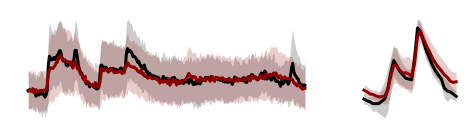

In [15]:
i=10

color_baden = 'darkred'
color_ctrl = 'k'
fig,ax=plt.subplots(1,2,figsize=(4,1),gridspec_kw={'width_ratios': [3, 1]})


idx = np.where(labels_both==i+1)[0]
ax[0].plot(np.mean(ctrl_1_both_chirp[idx,:],axis=0),color=color_ctrl)
ax[0].fill_between(np.arange(0,249,1),np.mean(ctrl_1_both_chirp[idx,:],axis=0)+np.std(ctrl_1_both_chirp[idx,:],axis=0),np.mean(ctrl_1_both_chirp[idx,:],axis=0)-np.std(ctrl_1_both_chirp[idx,:],axis=0),alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax[0].axis('off')


ax[1].plot(np.mean(ctrl_1_both_bar[idx,:],axis=0),color=color_ctrl)
ax[1].fill_between(np.arange(0,32,1),np.mean(ctrl_1_both_bar[idx,:],axis=0)+np.std(ctrl_1_both_bar[idx,:],axis=0),np.mean(ctrl_1_both_bar[idx,:],axis=0)-np.std(ctrl_1_both_bar[idx,:],axis=0),alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax[1].axis('off')


idx_baden = np.where(rgc_baden['label']==i+1)[0]
ax[0].plot(np.mean(rgc_baden['chirp'][idx_baden,:],axis=0),color=color_baden)
ax[0].fill_between(np.arange(0,249,1),np.mean(rgc_baden['chirp'][idx_baden,:],axis=0)+np.std(rgc_baden['chirp'][idx_baden,:],axis=0),np.mean(rgc_baden['chirp'][idx_baden,:],axis=0)-np.std(rgc_baden['chirp'][idx_baden,:],axis=0),alpha=0.2,color=color_baden,edgecolor="b", linewidth=0.0)
ax[0].axis('off')


ax[1].plot(np.mean(rgc_baden['bar'][idx_baden,:],axis=0),color=color_baden)
ax[1].fill_between(np.arange(0,32,1),np.mean(rgc_baden['bar'][idx_baden,:],axis=0)+np.std(rgc_baden['bar'][idx_baden,:],axis=0),np.mean(rgc_baden['bar'][idx_baden,:],axis=0)-np.std(rgc_baden['bar'][idx_baden,:],axis=0),alpha=0.2,color=color_baden,edgecolor="b", linewidth=0.0)
ax[1].axis('off')

print('G'+str(i+1)+'; r: '+str(round(np.corrcoef(np.mean(rgc_baden['chirp'][idx_baden,:],axis=0),np.mean(ctrl_1_both_chirp[idx,:],axis=0))[0,1],3)))
print('G'+str(i+1)+'; r: '+str(round(np.corrcoef(np.mean(rgc_baden['bar'][idx_baden,:],axis=0),np.mean(ctrl_1_both_bar[idx,:],axis=0))[0,1],3)))

# fast on

G17; r: 0.875
G17; r: 0.97


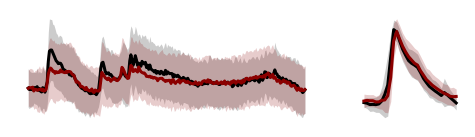

In [16]:
i=16

color_baden = 'darkred'
color_ctrl = 'k'
fig,ax=plt.subplots(1,2,figsize=(4,1),gridspec_kw={'width_ratios': [3, 1]})


idx = np.where(labels_both==i+1)[0]
ax[0].plot(np.mean(ctrl_1_both_chirp[idx,:],axis=0),color=color_ctrl)
ax[0].fill_between(np.arange(0,249,1),np.mean(ctrl_1_both_chirp[idx,:],axis=0)+np.std(ctrl_1_both_chirp[idx,:],axis=0),np.mean(ctrl_1_both_chirp[idx,:],axis=0)-np.std(ctrl_1_both_chirp[idx,:],axis=0),alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax[0].axis('off')


ax[1].plot(np.mean(ctrl_1_both_bar[idx,:],axis=0),color=color_ctrl)
ax[1].fill_between(np.arange(0,32,1),np.mean(ctrl_1_both_bar[idx,:],axis=0)+np.std(ctrl_1_both_bar[idx,:],axis=0),np.mean(ctrl_1_both_bar[idx,:],axis=0)-np.std(ctrl_1_both_bar[idx,:],axis=0),alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax[1].axis('off')


idx_baden = np.where(rgc_baden['label']==i+1)[0]
ax[0].plot(np.mean(rgc_baden['chirp'][idx_baden,:],axis=0),color=color_baden)
ax[0].fill_between(np.arange(0,249,1),np.mean(rgc_baden['chirp'][idx_baden,:],axis=0)+np.std(rgc_baden['chirp'][idx_baden,:],axis=0),np.mean(rgc_baden['chirp'][idx_baden,:],axis=0)-np.std(rgc_baden['chirp'][idx_baden,:],axis=0),alpha=0.2,color=color_baden,edgecolor="b", linewidth=0.0)
ax[0].axis('off')


ax[1].plot(np.mean(rgc_baden['bar'][idx_baden,:],axis=0),color=color_baden)
ax[1].fill_between(np.arange(0,32,1),np.mean(rgc_baden['bar'][idx_baden,:],axis=0)+np.std(rgc_baden['bar'][idx_baden,:],axis=0),np.mean(rgc_baden['bar'][idx_baden,:],axis=0)-np.std(rgc_baden['bar'][idx_baden,:],axis=0),alpha=0.2,color=color_baden,edgecolor="b", linewidth=0.0)
ax[1].axis('off')

print('G'+str(i+1)+'; r: '+str(round(np.corrcoef(np.mean(rgc_baden['chirp'][idx_baden,:],axis=0),np.mean(ctrl_1_both_chirp[idx,:],axis=0))[0,1],3)))
print('G'+str(i+1)+'; r: '+str(round(np.corrcoef(np.mean(rgc_baden['bar'][idx_baden,:],axis=0),np.mean(ctrl_1_both_bar[idx,:],axis=0))[0,1],3)))

G18; r: 0.92
G18; r: 0.962


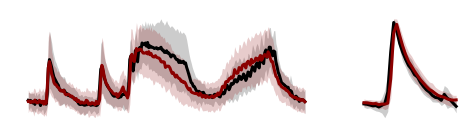

In [17]:
i=17

color_baden = 'darkred'
color_ctrl = 'k'
fig,ax=plt.subplots(1,2,figsize=(4,1),gridspec_kw={'width_ratios': [3, 1]})


idx = np.where(labels_both==i+1)[0]
ax[0].plot(np.mean(ctrl_1_both_chirp[idx,:],axis=0),color=color_ctrl)
ax[0].fill_between(np.arange(0,249,1),np.mean(ctrl_1_both_chirp[idx,:],axis=0)+np.std(ctrl_1_both_chirp[idx,:],axis=0),np.mean(ctrl_1_both_chirp[idx,:],axis=0)-np.std(ctrl_1_both_chirp[idx,:],axis=0),alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax[0].axis('off')


ax[1].plot(np.mean(ctrl_1_both_bar[idx,:],axis=0),color=color_ctrl)
ax[1].fill_between(np.arange(0,32,1),np.mean(ctrl_1_both_bar[idx,:],axis=0)+np.std(ctrl_1_both_bar[idx,:],axis=0),np.mean(ctrl_1_both_bar[idx,:],axis=0)-np.std(ctrl_1_both_bar[idx,:],axis=0),alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax[1].axis('off')


idx_baden = np.where(rgc_baden['label']==i+1)[0]
ax[0].plot(np.mean(rgc_baden['chirp'][idx_baden,:],axis=0),color=color_baden)
ax[0].fill_between(np.arange(0,249,1),np.mean(rgc_baden['chirp'][idx_baden,:],axis=0)+np.std(rgc_baden['chirp'][idx_baden,:],axis=0),np.mean(rgc_baden['chirp'][idx_baden,:],axis=0)-np.std(rgc_baden['chirp'][idx_baden,:],axis=0),alpha=0.2,color=color_baden,edgecolor="b", linewidth=0.0)
ax[0].axis('off')


ax[1].plot(np.mean(rgc_baden['bar'][idx_baden,:],axis=0),color=color_baden)
ax[1].fill_between(np.arange(0,32,1),np.mean(rgc_baden['bar'][idx_baden,:],axis=0)+np.std(rgc_baden['bar'][idx_baden,:],axis=0),np.mean(rgc_baden['bar'][idx_baden,:],axis=0)-np.std(rgc_baden['bar'][idx_baden,:],axis=0),alpha=0.2,color=color_baden,edgecolor="b", linewidth=0.0)
ax[1].axis('off')

print('G'+str(i+1)+'; r: '+str(round(np.corrcoef(np.mean(rgc_baden['chirp'][idx_baden,:],axis=0),np.mean(ctrl_1_both_chirp[idx,:],axis=0))[0,1],3)))
print('G'+str(i+1)+'; r: '+str(round(np.corrcoef(np.mean(rgc_baden['bar'][idx_baden,:],axis=0),np.mean(ctrl_1_both_bar[idx,:],axis=0))[0,1],3)))

# slow on

G21; r: 0.912
G21; r: 0.994


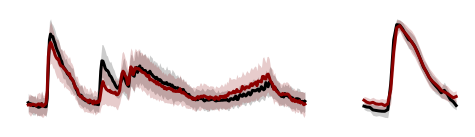

In [18]:
i=20

color_baden = 'darkred'
color_ctrl = 'k'
fig,ax=plt.subplots(1,2,figsize=(4,1),gridspec_kw={'width_ratios': [3, 1]})


idx = np.where(labels_both==i+1)[0]
ax[0].plot(np.mean(ctrl_1_both_chirp[idx,:],axis=0),color=color_ctrl)
ax[0].fill_between(np.arange(0,249,1),np.mean(ctrl_1_both_chirp[idx,:],axis=0)+np.std(ctrl_1_both_chirp[idx,:],axis=0),np.mean(ctrl_1_both_chirp[idx,:],axis=0)-np.std(ctrl_1_both_chirp[idx,:],axis=0),alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax[0].axis('off')


ax[1].plot(np.mean(ctrl_1_both_bar[idx,:],axis=0),color=color_ctrl)
ax[1].fill_between(np.arange(0,32,1),np.mean(ctrl_1_both_bar[idx,:],axis=0)+np.std(ctrl_1_both_bar[idx,:],axis=0),np.mean(ctrl_1_both_bar[idx,:],axis=0)-np.std(ctrl_1_both_bar[idx,:],axis=0),alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax[1].axis('off')


idx_baden = np.where(rgc_baden['label']==i+1)[0]
ax[0].plot(np.mean(rgc_baden['chirp'][idx_baden,:],axis=0),color=color_baden)
ax[0].fill_between(np.arange(0,249,1),np.mean(rgc_baden['chirp'][idx_baden,:],axis=0)+np.std(rgc_baden['chirp'][idx_baden,:],axis=0),np.mean(rgc_baden['chirp'][idx_baden,:],axis=0)-np.std(rgc_baden['chirp'][idx_baden,:],axis=0),alpha=0.2,color=color_baden,edgecolor="b", linewidth=0.0)
ax[0].axis('off')


ax[1].plot(np.mean(rgc_baden['bar'][idx_baden,:],axis=0),color=color_baden)
ax[1].fill_between(np.arange(0,32,1),np.mean(rgc_baden['bar'][idx_baden,:],axis=0)+np.std(rgc_baden['bar'][idx_baden,:],axis=0),np.mean(rgc_baden['bar'][idx_baden,:],axis=0)-np.std(rgc_baden['bar'][idx_baden,:],axis=0),alpha=0.2,color=color_baden,edgecolor="b", linewidth=0.0)
ax[1].axis('off')

print('G'+str(i+1)+'; r: '+str(round(np.corrcoef(np.mean(rgc_baden['chirp'][idx_baden,:],axis=0),np.mean(ctrl_1_both_chirp[idx,:],axis=0))[0,1],3)))
print('G'+str(i+1)+'; r: '+str(round(np.corrcoef(np.mean(rgc_baden['bar'][idx_baden,:],axis=0),np.mean(ctrl_1_both_bar[idx,:],axis=0))[0,1],3)))

G24; r: 0.984
G24; r: 0.993


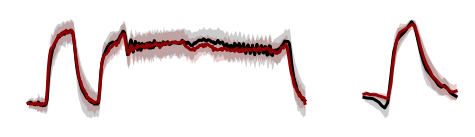

In [19]:
i=23

color_baden = 'darkred'
color_ctrl = 'k'
fig,ax=plt.subplots(1,2,figsize=(4,1),gridspec_kw={'width_ratios': [3, 1]})


idx = np.where(labels_both==i+1)[0]
ax[0].plot(np.mean(ctrl_1_both_chirp[idx,:],axis=0),color=color_ctrl)
ax[0].fill_between(np.arange(0,249,1),np.mean(ctrl_1_both_chirp[idx,:],axis=0)+np.std(ctrl_1_both_chirp[idx,:],axis=0),np.mean(ctrl_1_both_chirp[idx,:],axis=0)-np.std(ctrl_1_both_chirp[idx,:],axis=0),alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax[0].axis('off')


ax[1].plot(np.mean(ctrl_1_both_bar[idx,:],axis=0),color=color_ctrl)
ax[1].fill_between(np.arange(0,32,1),np.mean(ctrl_1_both_bar[idx,:],axis=0)+np.std(ctrl_1_both_bar[idx,:],axis=0),np.mean(ctrl_1_both_bar[idx,:],axis=0)-np.std(ctrl_1_both_bar[idx,:],axis=0),alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax[1].axis('off')


idx_baden = np.where(rgc_baden['label']==i+1)[0]
ax[0].plot(np.mean(rgc_baden['chirp'][idx_baden,:],axis=0),color=color_baden)
ax[0].fill_between(np.arange(0,249,1),np.mean(rgc_baden['chirp'][idx_baden,:],axis=0)+np.std(rgc_baden['chirp'][idx_baden,:],axis=0),np.mean(rgc_baden['chirp'][idx_baden,:],axis=0)-np.std(rgc_baden['chirp'][idx_baden,:],axis=0),alpha=0.2,color=color_baden,edgecolor="b", linewidth=0.0)
ax[0].axis('off')


ax[1].plot(np.mean(rgc_baden['bar'][idx_baden,:],axis=0),color=color_baden)
ax[1].fill_between(np.arange(0,32,1),np.mean(rgc_baden['bar'][idx_baden,:],axis=0)+np.std(rgc_baden['bar'][idx_baden,:],axis=0),np.mean(rgc_baden['bar'][idx_baden,:],axis=0)-np.std(rgc_baden['bar'][idx_baden,:],axis=0),alpha=0.2,color=color_baden,edgecolor="b", linewidth=0.0)
ax[1].axis('off')

print('G'+str(i+1)+'; r: '+str(round(np.corrcoef(np.mean(rgc_baden['chirp'][idx_baden,:],axis=0),np.mean(ctrl_1_both_chirp[idx,:],axis=0))[0,1],3)))
print('G'+str(i+1)+'; r: '+str(round(np.corrcoef(np.mean(rgc_baden['bar'][idx_baden,:],axis=0),np.mean(ctrl_1_both_bar[idx,:],axis=0))[0,1],3)))

## unc. rgcs

G31; r: 0.944
G31; r: 0.857


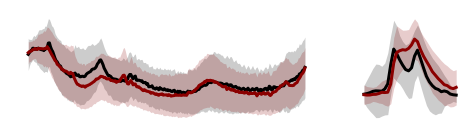

In [20]:
i=30

color_baden = 'darkred'
color_ctrl = 'k'
fig,ax=plt.subplots(1,2,figsize=(4,1),gridspec_kw={'width_ratios': [3, 1]})


idx = np.where(labels_both==i+1)[0]
ax[0].plot(np.mean(ctrl_1_both_chirp[idx,:],axis=0),color=color_ctrl)
ax[0].fill_between(np.arange(0,249,1),np.mean(ctrl_1_both_chirp[idx,:],axis=0)+np.std(ctrl_1_both_chirp[idx,:],axis=0),np.mean(ctrl_1_both_chirp[idx,:],axis=0)-np.std(ctrl_1_both_chirp[idx,:],axis=0),alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax[0].axis('off')


ax[1].plot(np.mean(ctrl_1_both_bar[idx,:],axis=0),color=color_ctrl)
ax[1].fill_between(np.arange(0,32,1),np.mean(ctrl_1_both_bar[idx,:],axis=0)+np.std(ctrl_1_both_bar[idx,:],axis=0),np.mean(ctrl_1_both_bar[idx,:],axis=0)-np.std(ctrl_1_both_bar[idx,:],axis=0),alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax[1].axis('off')


idx_baden = np.where(rgc_baden['label']==i+1)[0]
ax[0].plot(np.mean(rgc_baden['chirp'][idx_baden,:],axis=0),color=color_baden)
ax[0].fill_between(np.arange(0,249,1),np.mean(rgc_baden['chirp'][idx_baden,:],axis=0)+np.std(rgc_baden['chirp'][idx_baden,:],axis=0),np.mean(rgc_baden['chirp'][idx_baden,:],axis=0)-np.std(rgc_baden['chirp'][idx_baden,:],axis=0),alpha=0.2,color=color_baden,edgecolor="b", linewidth=0.0)
ax[0].axis('off')


ax[1].plot(np.mean(rgc_baden['bar'][idx_baden,:],axis=0),color=color_baden)
ax[1].fill_between(np.arange(0,32,1),np.mean(rgc_baden['bar'][idx_baden,:],axis=0)+np.std(rgc_baden['bar'][idx_baden,:],axis=0),np.mean(rgc_baden['bar'][idx_baden,:],axis=0)-np.std(rgc_baden['bar'][idx_baden,:],axis=0),alpha=0.2,color=color_baden,edgecolor="b", linewidth=0.0)
ax[1].axis('off')

print('G'+str(i+1)+'; r: '+str(round(np.corrcoef(np.mean(rgc_baden['chirp'][idx_baden,:],axis=0),np.mean(ctrl_1_both_chirp[idx,:],axis=0))[0,1],3)))
print('G'+str(i+1)+'; r: '+str(round(np.corrcoef(np.mean(rgc_baden['bar'][idx_baden,:],axis=0),np.mean(ctrl_1_both_bar[idx,:],axis=0))[0,1],3)))

G32; r: 0.822
G32; r: 0.977


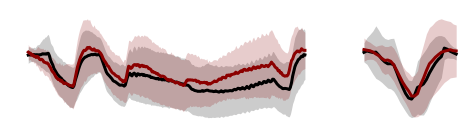

In [21]:
i=31

color_baden = 'darkred'
color_ctrl = 'k'
fig,ax=plt.subplots(1,2,figsize=(4,1),gridspec_kw={'width_ratios': [3, 1]})


idx = np.where(labels_both==i+1)[0]
ax[0].plot(np.mean(ctrl_1_both_chirp[idx,:],axis=0),color=color_ctrl)
ax[0].fill_between(np.arange(0,249,1),np.mean(ctrl_1_both_chirp[idx,:],axis=0)+np.std(ctrl_1_both_chirp[idx,:],axis=0),np.mean(ctrl_1_both_chirp[idx,:],axis=0)-np.std(ctrl_1_both_chirp[idx,:],axis=0),alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax[0].axis('off')


ax[1].plot(np.mean(ctrl_1_both_bar[idx,:],axis=0),color=color_ctrl)
ax[1].fill_between(np.arange(0,32,1),np.mean(ctrl_1_both_bar[idx,:],axis=0)+np.std(ctrl_1_both_bar[idx,:],axis=0),np.mean(ctrl_1_both_bar[idx,:],axis=0)-np.std(ctrl_1_both_bar[idx,:],axis=0),alpha=0.2,color=color_ctrl,edgecolor="b", linewidth=0.0)
ax[1].axis('off')


idx_baden = np.where(rgc_baden['label']==i+1)[0]
ax[0].plot(np.mean(rgc_baden['chirp'][idx_baden,:],axis=0),color=color_baden)
ax[0].fill_between(np.arange(0,249,1),np.mean(rgc_baden['chirp'][idx_baden,:],axis=0)+np.std(rgc_baden['chirp'][idx_baden,:],axis=0),np.mean(rgc_baden['chirp'][idx_baden,:],axis=0)-np.std(rgc_baden['chirp'][idx_baden,:],axis=0),alpha=0.2,color=color_baden,edgecolor="b", linewidth=0.0)
ax[0].axis('off')


ax[1].plot(np.mean(rgc_baden['bar'][idx_baden,:],axis=0),color=color_baden)
ax[1].fill_between(np.arange(0,32,1),np.mean(rgc_baden['bar'][idx_baden,:],axis=0)+np.std(rgc_baden['bar'][idx_baden,:],axis=0),np.mean(rgc_baden['bar'][idx_baden,:],axis=0)-np.std(rgc_baden['bar'][idx_baden,:],axis=0),alpha=0.2,color=color_baden,edgecolor="b", linewidth=0.0)
ax[1].axis('off')

print('G'+str(i+1)+'; r: '+str(round(np.corrcoef(np.mean(rgc_baden['chirp'][idx_baden,:],axis=0),np.mean(ctrl_1_both_chirp[idx,:],axis=0))[0,1],3)))
print('G'+str(i+1)+'; r: '+str(round(np.corrcoef(np.mean(rgc_baden['bar'][idx_baden,:],axis=0),np.mean(ctrl_1_both_bar[idx,:],axis=0))[0,1],3)))

# Inter-group correlation

In [23]:
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
top = cm.get_cmap('Oranges_r', 128) # r means reversed version
bottom = cm.get_cmap('Blues', 128)# combine it all
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))# create a new colormaps with a name of OrangeBlue
orange_blue = ListedColormap(newcolors, name='OrangeBlue')

In [24]:
corrcoeff_baden_chirp_ctrl = np.zeros((32,32))
corrcoeff_baden_bar_ctrl = np.zeros((32,32))
for i in range(32):
    for j in range(32):        
        corrcoeff_baden_chirp_ctrl[i,j] = np.corrcoef(np.mean(rgc_baden['chirp'][rgc_baden['label'].flatten()==j+1],axis=0),np.mean(ctrl_1_both_chirp[labels_both.flatten()==i+1],axis=0))[0,1]
        corrcoeff_baden_bar_ctrl[i,j] = np.corrcoef(np.mean(rgc_baden['bar'][rgc_baden['label'].flatten()==j+1],axis=0),np.mean(ctrl_1_both_bar[labels_both.flatten()==i+1],axis=0))[0,1]

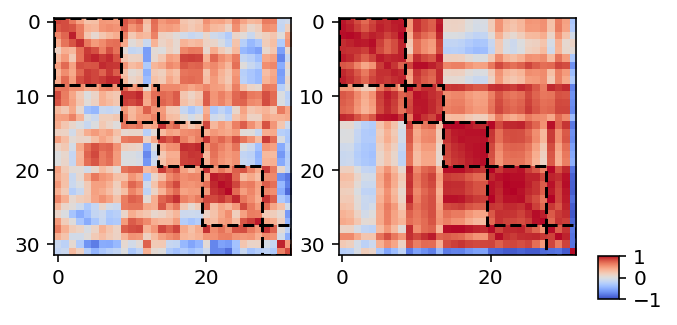

In [25]:
off_rect = patches.Rectangle((-0.5,-0.5), 9, 9, linewidth=1.5, edgecolor='k', facecolor='none',ls='--')
on_off_rect = patches.Rectangle((8.5,8.5), 5,5, linewidth=1.5, edgecolor='k', facecolor='none',ls='--')
fast_on_rect = patches.Rectangle((13.5,13.5), 6,6, linewidth=1.5, edgecolor='k', facecolor='none',ls='--')
slow_on_rect = patches.Rectangle((19.5,19.5), 8,8, linewidth=1.5, edgecolor='k', facecolor='none',ls='--')
unc_rgc_rect = patches.Rectangle((27.5,27.5), 4,4, linewidth=1.5, edgecolor='k', facecolor='none',ls='--')

fig,ax=plt.subplots(1,2,figsize=(5,3))
cax = ax[0].imshow(corrcoeff_baden_chirp_ctrl,cmap='coolwarm',vmin=-1,vmax=1)
ax[0].add_patch(off_rect)
ax[0].add_patch(on_off_rect)
ax[0].add_patch(fast_on_rect)
ax[0].add_patch(slow_on_rect)
ax[0].add_patch(unc_rgc_rect)
#ax[0].set_xticks([])
#ax[0].set_yticks([])

off_rect = patches.Rectangle((-0.5,-0.5), 9, 9, linewidth=1.5, edgecolor='k', facecolor='none',ls='--')
on_off_rect = patches.Rectangle((8.5,8.5), 5,5, linewidth=1.5, edgecolor='k', facecolor='none',ls='--')
fast_on_rect = patches.Rectangle((13.5,13.5), 6,6, linewidth=1.5, edgecolor='k', facecolor='none',ls='--')
slow_on_rect = patches.Rectangle((19.5,19.5), 8,8, linewidth=1.5, edgecolor='k', facecolor='none',ls='--')
unc_rgc_rect = patches.Rectangle((27.5,27.5), 4,4, linewidth=1.5, edgecolor='k', facecolor='none',ls='--')
cax = ax[1].imshow(corrcoeff_baden_bar_ctrl,cmap='coolwarm',vmin=-1,vmax=1)
ax[1].add_patch(off_rect)
ax[1].add_patch(on_off_rect)
ax[1].add_patch(fast_on_rect)
ax[1].add_patch(slow_on_rect)
ax[1].add_patch(unc_rgc_rect)
#ax[1].set_xticks([])
#ax[1].set_yticks([])

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.126, 0.03, 0.1])
cbar = fig.colorbar(cax, cax=cbar_ax, shrink=0.99)